In [1]:
from main import *

## Gun Modelv2

OCC_Gun_modelv2/al_0.01_mu_100,1_sig_4.5e6,3.5e7/1e1-1e8_40_el_27541_ord_4_POD_13_1e-6/Data/
Opening files from this path =  OCC_Gun_modelv2/al_0.01_mu_100,1_sig_4.5e6,3.5e7/1e1-1e8_40_el_27541_ord_4_POD_13_1e-6/Data/


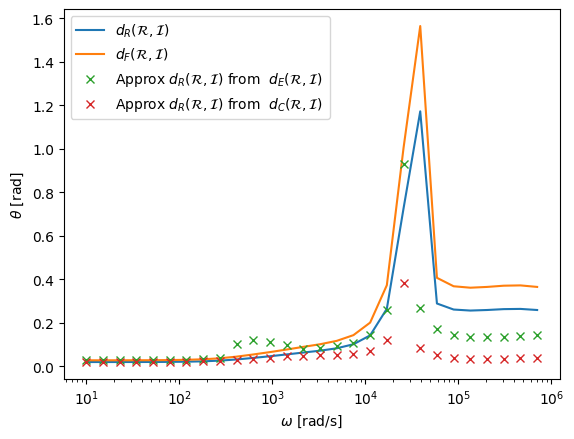

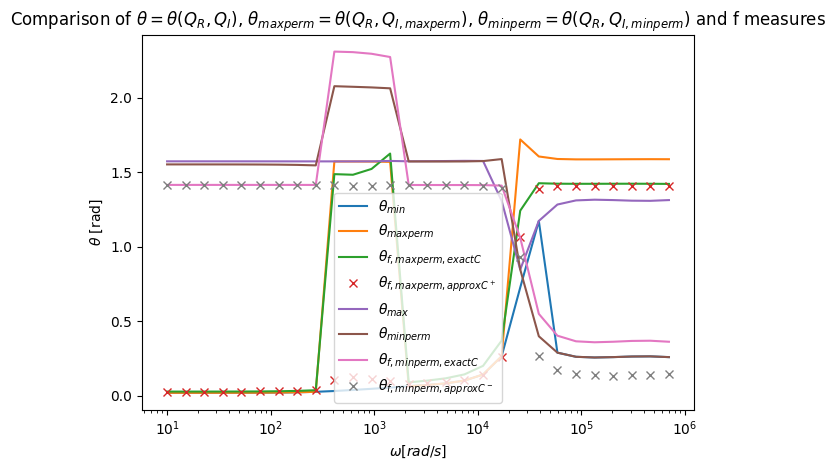

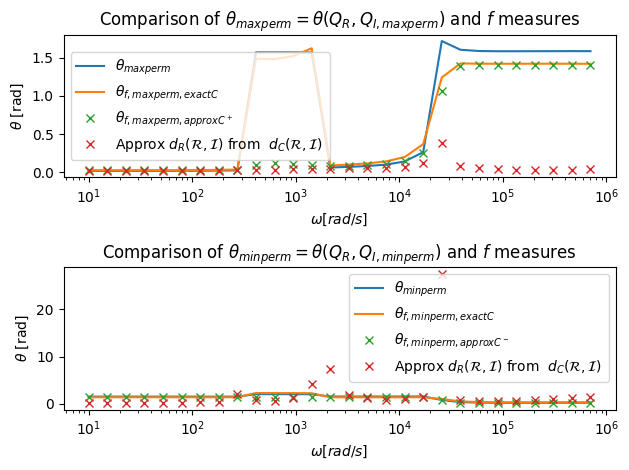

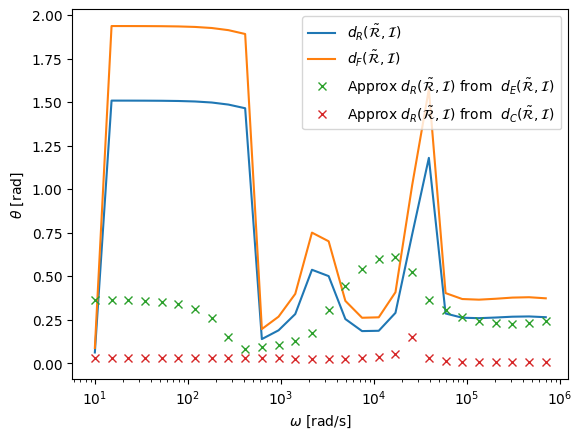

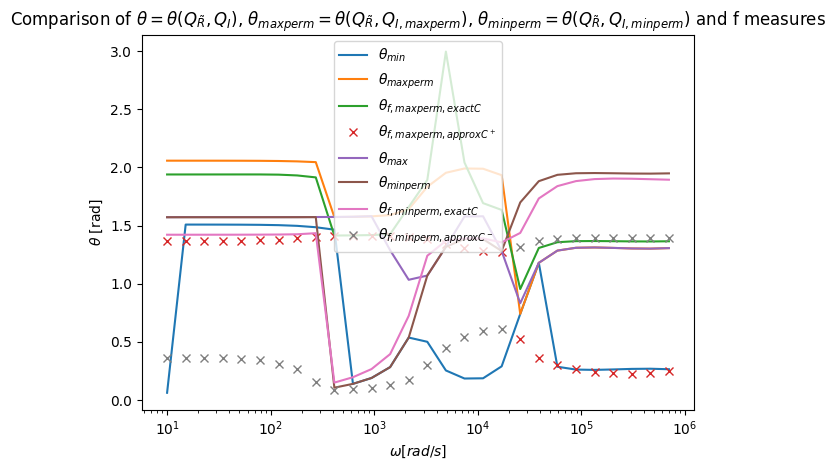

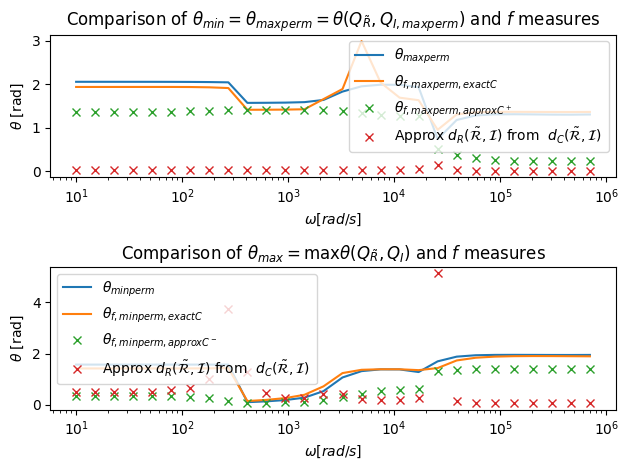

In [12]:
DirList=["OCC_Gun_modelv2/al_0.01_mu_100,1_sig_4.5e6,3.5e7/1e1-1e8_40_el_27541_ord_4_POD_13_1e-6/Data/"]
SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e6
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults=main(directory,MaxOmega,Figures="On")

dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min'])


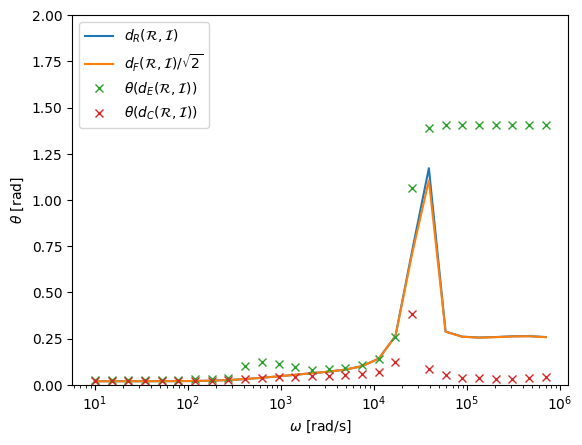

In [13]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"]
AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_E({\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_C({\cal R},{\cal I}))$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,2)
plt.legend()
#plt.savefig("OCC_dualbar_dRanddE_metrics_al_0.001_mu_1,1_sig_1e6,1e8_ord4.pdf")
plt.show()

dict_keys(['Frequencies', 'MinAnglestoreRtildeI', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_min', 'dFMinAnglestoreRtildeI', 'dFMaxAnglestoreRtildeI', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_min'])


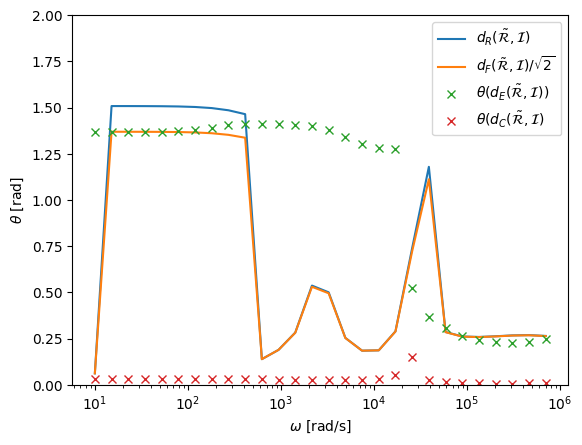

In [14]:
print(RtildeIResults.keys())

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"]
dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I})$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,2)
plt.legend()
#plt.savefig("OCC_dualbar_dRanddE_metrics_tilde_al_0.001_mu_1,1_sig_1e6,1e8_ord4.pdf")
plt.show()